In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import os
import seaborn as sns
import pandas as pd

In [2]:
def parse_ping(txt_file, ignore_time = None):
    with open(txt_file, 'r') as f:
        txt = f.read()
    time_arr = []
    for line in txt.strip().split('\n'):
        time = None
        icmp_seq = 'icmp_seq='
        if (icmp_seq in line):
            temp1 = line[line.index(icmp_seq) + len(icmp_seq):]
            time = int(temp1[:temp1.index(' ')])
        if (ignore_time is not None and time is not None and time <= ignore_time):
            try:
                temp = float(line[line.index("time=") + 5:].replace(' ms', ''))
                time_arr += [temp]
            except:
                continue
    return np.array(time_arr)

def parse_server(txt_file):
    with open(txt_file, 'r') as f:
        txt = f.read()
    temp = re.sub(' +', ' ', txt.strip())
    string_index_retr = '[ ID] Interval Transfer Bitrate Retr'
    string_index = '[ ID] Interval Transfer Bitrate'
    if (string_index_retr in temp):
        temp2 = temp[temp.index(string_index_retr) + len(string_index_retr):]
        temp3 = temp2[temp2.index(string_index_retr) + len(string_index_retr):].strip().split('\n')[0].split(' ')
    else:
        temp2 = temp[temp.index(string_index) + len(string_index):]
        temp3 = temp2[temp2.index(string_index) + len(string_index):].strip().split('\n')[0].split(' ')
    return float(temp3[4])

# Parse files

In [3]:
bbr_server_h1_res = pd.DataFrame([], columns=['queueSize', 'bbr_server_h1_res'])
bbr_server_h4_res = pd.DataFrame([], columns=['queueSize', 'bbr_server_h4_res'])
bbr_client_res = pd.DataFrame([], columns=['queueSize', 'bbr_client_res'])
cubic_server_h1_res = pd.DataFrame([], columns=['queueSize', 'cubic_server_h1_res'])
cubic_server_h4_res = pd.DataFrame([], columns=['queueSize', 'cubic_server_h4_res'])
cubic_client_res = pd.DataFrame([], columns=['queueSize', 'cubic_client_res'])
for file_name in os.listdir('results/q3'):
    file_path = os.path.join('results/q3', file_name)
    if ('bbr' in file_name):
        if ('server' in file_name):
            y_label = int(file_name.split('_')[-1])
            if ('h1' in file_name):
                temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns=['queueSize', 'bbr_server_h1_res'])
                bbr_server_h1_res = pd.concat([bbr_server_h1_res, temp])
            elif ('h4' in file_name):
                temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns=['queueSize', 'bbr_server_h4_res'])
                bbr_server_h4_res = pd.concat([bbr_server_h4_res, temp])
        elif ('client' in file_name):
            y_label = int(file_name.split('_')[-1])
            temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns=['queueSize', 'bbr_client_res'])
            bbr_client_res = pd.concat([bbr_client_res, temp])
    if ('cubic' in file_name):
        if ('server' in file_name):
            y_label = int(file_name.split('_')[-1])
            if ('h1' in file_name):
                temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns=['queueSize', 'cubic_server_h1_res'])
                cubic_server_h1_res = pd.concat([cubic_server_h1_res, temp])
            elif ('h4' in file_name):
                temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns=['queueSize', 'cubic_server_h4_res'])
                cubic_server_h4_res = pd.concat([cubic_server_h4_res, temp])
        elif ('client' in file_name):
            y_label = int(file_name.split('_')[-1])
            temp = pd.DataFrame([[y_label, parse_server(file_path)]], columns=['queueSize', 'cubic_client_res'])
            cubic_client_res = pd.concat([cubic_client_res, temp])

In [4]:
bbr_server_h4_res['bbr_server_h4_res'] = bbr_server_h4_res['bbr_server_h4_res'] / 1000
cubic_server_h4_res['cubic_server_h4_res'] = cubic_server_h4_res['cubic_server_h4_res'] / 1000

# Plot figures

### BBR

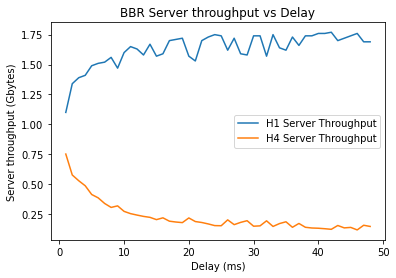

In [5]:
merged_bbr_server_client = pd.melt(bbr_server_h1_res.merge(bbr_server_h4_res), ['queueSize']).rename(columns={'variable':'label', 'value':'y'})
ax = sns.lineplot(x='queueSize', y='y', hue='label', data=merged_bbr_server_client)
ax.set(xlabel='Delay (ms)', ylabel='Server throughput (Gbytes)', title='BBR Server throughput vs Delay')
plt.legend(labels=['H1 Server Throughput', 'H4 Server Throughput'])
plt.show()

### Cubic

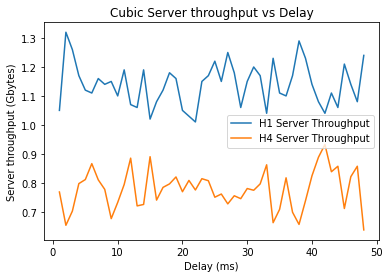

In [6]:
merged_cubic_server_client = pd.melt(cubic_server_h1_res.merge(cubic_server_h4_res), ['queueSize']).rename(columns={'variable':'label', 'value':'y'})
ax = sns.lineplot(x='queueSize', y='y', hue='label', data=merged_cubic_server_client)
ax.set(xlabel='Delay (ms)', ylabel='Server throughput (Gbytes)', title='Cubic Server throughput vs Delay')
plt.legend(labels=['H1 Server Throughput', 'H4 Server Throughput'])
plt.show()